Step 1: Understand the dataset
The first thing you should do is to load the CSV file and understand the dataset. 
It is important to understand the dataset and examine if there is any missing values or outliers before doing analysis. 
In this step, you should write Python scripts to answer the following questions.

In [1]:
import pandas as pd
clv = pd.read_csv(r'clv_transactions.csv')

In [2]:
clv.head()

,TransactionID,TransactionDate,CustomerID,Amount
0,1,9/4/2012,1,20.26
1,2,5/15/2012,2,10.87
2,3,5/23/2014,2,2.21
3,4,10/24/2014,2,10.48
4,5,10/13/2012,2,3.94


In [3]:
clv.describe()

,TransactionID,CustomerID,Amount
count,4186.000000,4186.000000,4186.000000
mean,2093.500000,516.165791,9.028082
std,1208.538442,291.465283,38.723909
min,1.000000,1.000000,-1.000000
25%,1047.250000,270.000000,3.310000
50%,2093.500000,522.000000,6.885000
75%,3139.750000,762.750000,11.690000
max,4186.000000,1000.000000,2033.000000


In [4]:
clv.isnull().sum()

TransactionID      0
TransactionDate    0
CustomerID         0
Amount             0
dtype: int64

In [5]:
clv.isnull().values.any()

False

1. Are there any missing values in the dataset?
There are no missing values in the dataset

In [6]:
print('2. What is the range of dates in the dataset?')
clv['TransactionDate']=pd.to_datetime(clv['TransactionDate'])
print('Minimum date - '+str(clv['TransactionDate'].min().date()))
print('Maximum date - '+str(clv['TransactionDate'].max().date()))

2. What is the range of dates in the dataset?
Minimum date - 2010-01-04
Maximum date - 2015-12-31


In [7]:
print('3. How many unique customers are there in the dataset?')
print('There are ', clv['CustomerID'].nunique() , ' unique customers in the dataset provided')

3. How many unique customers are there in the dataset?
There are  1000  unique customers in the dataset provided


In [8]:
import statistics
print('4. Profile the data to give the standard descriptive statistics for the Amount field.')
print('What is the min, max, variance, and standard deviations?')
print()
print('Min: ', clv['Amount'].min())
print('Max: ', clv['Amount'].max())
print('Variance: ', round(clv['Amount'].var(),2))
print('Standard Deviation: ', round(statistics.stdev(clv['Amount']),2))

4. Profile the data to give the standard descriptive statistics for the Amount field.
What is the min, max, variance, and standard deviations?

Min:  -1.0
Max:  2033.0
Variance:  1499.54
Standard Deviation:  38.72


In [9]:
#storing the year of the transactions in a new column of the dataframe ('Year')

Text(0, 0.5, 'Total Amount Spent per year')

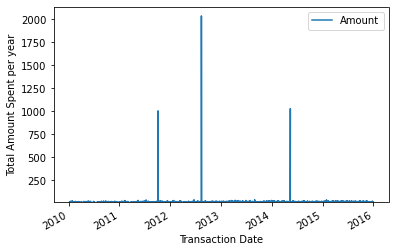

In [10]:
import matplotlib.pyplot as plt
clv['Year'] = pd.DatetimeIndex(clv['TransactionDate']).year
clv.plot.line('TransactionDate', 'Amount', ylim=10)
plt.xlabel("Transaction Date")
plt.ylabel("Total Amount Spent per year")

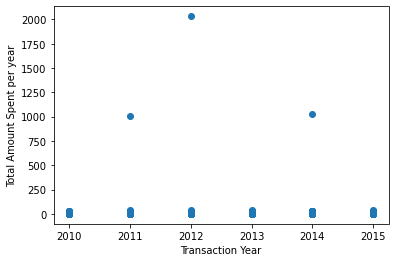

In [11]:
plt.scatter(clv['Year'], clv['Amount'])
plt.xlabel("Transaction Year")
plt.ylabel("Total Amount Spent per year")
plt.show()

5. Do transaction amounts in general increase over time (perhaps due to inflation)?

After plotting a scatter plot of the year of the transactions against the amount, we can see that there is 
no general trend that we can notice between the amount and the year. 

STEP 2 : EXPLORE THE DATASET

Next, explore the dataset to check if there are any outlier or if there are values that don’t make sense. 
You can use statistical tests to check for outliers. 
Or, you can simply plot the histogram of the Amount and see if there is any value that appears to be abnormal. 
(Hint, is there any value that appears to be abnormally large or small? 
Could it be caused by bad entries (e.g. forgetting decimal separator?). 
In this step, you should write python scripts to help you answer the following questions.


In [12]:
import numpy as np

print(np.percentile(clv['Amount'], 25))
print(np.percentile(clv['Amount'], 50))
print(np.percentile(clv['Amount'], 75))
print(np.percentile(clv['Amount'], 99))
print(np.percentile(clv['Amount'], 100))

3.31
6.885
11.69
25.871499999999997
2033.0


After looking at the percentile values of Amount, it is clear that around 99 percent of the values are 25 or under. 
However, there are some outliers that are skewing the data towards the right. 

<AxesSubplot:xlabel='Amount'>

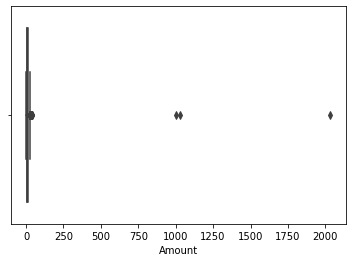

In [13]:
import seaborn as sns
sns.boxplot(x=clv['Amount'])

It is apparent after the boxlot that there appear to be some values greater than 250 that are the outliers. 

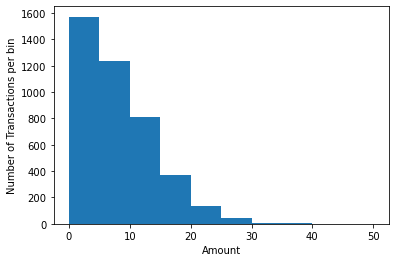

In [14]:
plt.hist(clv['Amount'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.xlabel("Amount")
plt.ylabel("Number of Transactions per bin")
plt.show()

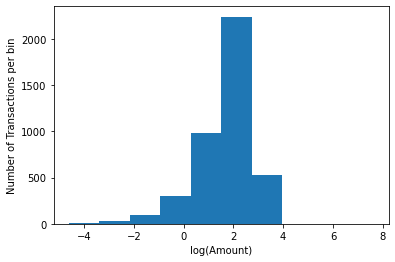

In [15]:
high = clv[clv['Amount']>0]
plt.hist(np.log(high['Amount']))
plt.xlabel("log(Amount)")
plt.ylabel("Number of Transactions per bin")
plt.show()

In [16]:
low = clv[clv['Amount']<0]
print(len(low))

2


In [17]:
outliers = clv[(clv['Amount']<0) | (clv['Amount']>250)]
print(outliers)

      TransactionID TransactionDate  CustomerID  Amount  Year
23               24      2011-10-07           7  1003.0  2011
49               50      2012-05-12          13    -1.0  2012
211             212      2014-05-14          54  1027.0  2014
3326           3327      2014-01-16         811    -1.0  2014
4177           4178      2012-08-13        1000  2033.0  2012


In [18]:
print(len(clv))

4186


1. Are there any outliers?
As evident from the histogram and the boxplot, we can clearly see that there are outliers in the dataset. 
Also, the lowest value in the Amount column is -1. Since amount can't be negative, all the negative values in the 
dataset are considered to be bad entries. 
The value at the 99th percentile of the 'Amount' column is $25.8. This means that 99% of the values in the Amount
column are less than 25.8. 
The dataframe 'outliers' contains the 5 transactions with extremely low or extremely high values. 


2. If so how would you treat them?
As outliers skew the data to right or left (right, in this case) and since we only have 5 such outliers in our data set, it is best to discard the outliers from our dataset before we make any further analysis on our data. 
However, it is also a good idea to analyse the outliers based on bad entries. For example, the values 1003, 1027 and 2033 in our dataset could be a result of forgetting the decimal separator. In this case, we consider them all outliers and discard them from our dataset. 

In [19]:
clv.drop(clv[(clv['Amount']<0) | (clv['Amount']>250)].index, inplace = True)
len(clv)

4181

 STEP 3 - DETERMINE ORIGIN YEAR OF CUSTOMERS

In [20]:
clv.head()

,TransactionID,TransactionDate,CustomerID,Amount,Year
0,1,2012-09-04,1,20.26,2012
1,2,2012-05-15,2,10.87,2012
2,3,2014-05-23,2,2.21,2014
3,4,2014-10-24,2,10.48,2014
4,5,2012-10-13,2,3.94,2012


In [21]:
#storing all the unique customer IDs in a new array (UCID)
#storing all the unique customer IDs and their corresponding oldest transaction year in a dictionary (CID_Year)

In [22]:
UCID = clv['CustomerID'].unique()
CID_Year = {}

for j in UCID:
    a=clv[clv['CustomerID']==j]
    value=(a['Year'].min())
    key=j
    CID_Year[key]=value      

In [23]:
#storing years as keys and all the acquired customer ID as values in a dictionary (yearwise)

In [24]:
yearwise = {}
value=[]
for k, v in CID_Year.items():
    key=v
    for i,j in CID_Year.items():
        if (key==j):
            value.append(i)
    yearwise[key]=value
    value=[]

In [25]:
print(yearwise.keys())
print(yearwise[2012])

dict_keys([2012, 2015, 2013, 2010, 2014, 2011])
[1, 2, 3, 7, 8, 14, 18, 23, 24, 28, 31, 33, 34, 44, 65, 69, 70, 74, 83, 84, 88, 92, 99, 126, 133, 137, 145, 171, 178, 181, 187, 199, 202, 203, 212, 219, 223, 224, 225, 228, 229, 232, 233, 240, 245, 250, 260, 273, 274, 277, 278, 283, 284, 291, 294, 301, 308, 310, 316, 320, 329, 335, 339, 343, 345, 350, 351, 354, 371, 372, 378, 380, 392, 399, 400, 402, 403, 414, 417, 428, 436, 446, 449, 450, 463, 464, 473, 478, 486, 490, 498, 503, 505, 511, 512, 519, 539, 543, 560, 562, 570, 586, 591, 596, 597, 605, 611, 626, 627, 629, 636, 638, 645, 665, 669, 671, 691, 704, 709, 736, 739, 751, 762, 774, 791, 792, 795, 798, 799, 809, 814, 824, 826, 830, 835, 837, 841, 846, 847, 852, 855, 859, 864, 876, 878, 880, 899, 911, 918, 921, 924, 931, 933, 939, 942, 948, 949, 963, 966, 967, 975, 994, 996]


STEP 4 : CALCULATE CUMMULATIVE TRANSACTION AMOUNTS

In [26]:
#Cummulative Transaction Amounts

def cmltv (year):
    max_year = max(yearwise.keys(), key=int)
    a=yearwise[year]
    result = dict.fromkeys(range(year, max_year+1), 0)
    for i in a:
        test=clv[clv['CustomerID']==i]
        amt=0
        for b in range(year, max_year+1):
            xtest=test[test['Year']==b]
            for c in range(len(xtest)):
                amt=amt+xtest.iloc[c,3]
            temp=result[b]
            result[b]=round((temp+amt),2)
    return (list(result.values()))      

In [27]:
print('Origin                    12        24       36       48       60      72')
print('2010-01-01 - 2010-12-31', cmltv(2010))
print('2011-01-01 - 2011-12-31', cmltv(2011))
print('2012-01-01 - 2012-12-31', cmltv(2012))
print('2013-01-01 - 2013-12-31', cmltv(2013))
print('2014-01-01 - 2014-12-31', cmltv(2014))
print('2015-01-01 - 2015-12-31', cmltv(2015))

Origin                    12        24       36       48       60      72
2010-01-01 - 2010-12-31 [2259.67, 3614.78, 5274.81, 6632.37, 7930.69, 8964.49]
2011-01-01 - 2011-12-31 [2238.46, 3757.9, 5465.99, 6703.11, 7862.24]
2012-01-01 - 2012-12-31 [2181.35, 3874.69, 5226.86, 6501.85]
2013-01-01 - 2013-12-31 [2179.85, 3609.81, 5227.75]
2014-01-01 - 2014-12-31 [1830.85, 3262.05]
2015-01-01 - 2015-12-31 [1912.17]


STEP 5 : CALCULATE NUMBER OF NEW CUSTOMERS PER YEAR

In [28]:
#New Customers

def new_customer (year):
    max_year = max(yearwise.keys(), key=int)
    a=yearwise[year]
    NewCustomers = dict.fromkeys(range(year, max_year+1), 0)
    for i in a:
        test=clv[clv['CustomerID']==i]
        count=0
        for b in range(year, max_year+1):
            xtest=test[test['Year']==b]
            count=+1
            temp=NewCustomers[b]
            NewCustomers[b]=(temp+count)
    return (list(NewCustomers.values()))
    

In [29]:
print('Origin                   12    24   36   48   60   72')
print('2010-01-01 - 2010-12-31', new_customer(2010))
print('2011-01-01 - 2011-12-31', new_customer(2011))
print('2012-01-01 - 2012-12-31', new_customer(2012))
print('2013-01-01 - 2013-12-31', new_customer(2013))
print('2014-01-01 - 2014-12-31', new_customer(2014))
print('2015-01-01 - 2015-12-31', new_customer(2015))

Origin                   12    24   36   48   60   72
2010-01-01 - 2010-12-31 [172, 172, 172, 172, 172, 172]
2011-01-01 - 2011-12-31 [170, 170, 170, 170, 170]
2012-01-01 - 2012-12-31 [163, 163, 163, 163]
2013-01-01 - 2013-12-31 [180, 180, 180]
2014-01-01 - 2014-12-31 [155, 155]
2015-01-01 - 2015-12-31 [160]


STEP 6 : CALCULATE HISTORIC CLV

In [30]:
def HistoricCLV (year):
    res = [round(i / j, 2) for i, j in zip(cmltv(year),new_customer(year))]
    return(res)

In [31]:
print('Historic CLV')
print('Origin                    12      24     36     48    60   72')
print('2010-01-01 - 2010-12-31', HistoricCLV(2010))
print('2011-01-01 - 2011-12-31', HistoricCLV(2011))
print('2012-01-01 - 2012-12-31', HistoricCLV(2012))
print('2013-01-01 - 2013-12-31', HistoricCLV(2013))
print('2014-01-01 - 2014-12-31', HistoricCLV(2014))
print('2015-01-01 - 2015-12-31', HistoricCLV(2015))

Historic CLV
Origin                    12      24     36     48    60   72
2010-01-01 - 2010-12-31 [13.14, 21.02, 30.67, 38.56, 46.11, 52.12]
2011-01-01 - 2011-12-31 [13.17, 22.11, 32.15, 39.43, 46.25]
2012-01-01 - 2012-12-31 [13.38, 23.77, 32.07, 39.89]
2013-01-01 - 2013-12-31 [12.11, 20.05, 29.04]
2014-01-01 - 2014-12-31 [11.81, 21.05]
2015-01-01 - 2015-12-31 [11.95]


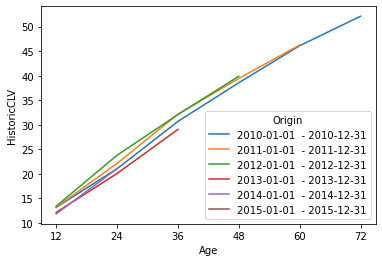

In [32]:
import warnings
warnings.filterwarnings("ignore")

min_year= min(yearwise.keys(), key=int)
max_year =  max(yearwise.keys(), key=int)

def historicplot(min_year,max_year):
    fig, ax = plt.subplots()
    for i in range(min_year, max_year):
        curvelabel= (str(i)+'-01-01  - '+str(i)+'-12-31')
        ax.plot(HistoricCLV(i), label=curvelabel)
    plt.legend(title="Origin")
    plt.xlabel("Age")
    plt.ylabel("HistoricCLV")
    ax.set_xticklabels(["0", "12", "24", "36", "48", "60", "72"])
    plt.show()
        
historicplot(min_year, max_year+1)

12 12.72
24 21.6
36 30.98
48 39.29
60 46.18
72 52.12


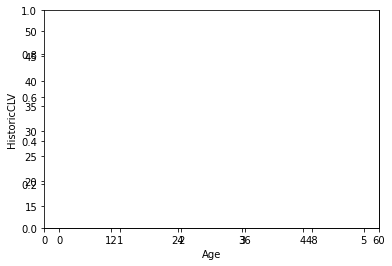

In [33]:
def singlecurve(min_year, max_year):
    bins=(max_year+1)-min_year
    temp=[0]*bins
    bin=[0]*bins
    for i in range(min_year, max_year):
        res=HistoricCLV(i)
        for j in range(len(res)):
            temp[j]=temp[j]+res[j]
            bin[j]=bin[j]+1
    result = [i / j for i, j in zip(temp, bin)]
    return result
    
plt.plot(singlecurve(min_year, max_year), marker="+")
ax=plt.axes()
ax.set_xticklabels([0, 12, 24, 36, 48, 60, 72])
plt.xlabel("Age")
plt.ylabel("HistoricCLV")
scurve=singlecurve(min_year, max_year)

age=12

for i in range(len(scurve)):
    print(str(age)+' '+str(round(scurve[i],2)))
    age+=12

Step 7: Interpreting your results
Interpret the historic CLV and briefly answer the following question: 
- How much have customers acquired in 2011 spent to date?

Looking at the cummulative amount trianalysis, we can see that customers acquired in 2011 have spent $7862.24. 


- Do each group of customers exhibit similar or different patterns of spending? 
  What’s the implication for the business?
    
Looking at the cummulative amount trianalysis, we can see that amount of money spent by customers acquired in any 
year is comparable to the amount of money spent by customers acquired in any other year 
for a particular period of time after acquisition. 


For example, Customer acquired in 2010 spent 2259.67 in the first 12 months after acquisition. 
Similary, customers acquired in 2011, 2012, 2013, 2014 and 2015 spent within the range 1912 - 2238 which is quite 
comparable. Same can be said about every year group for every period after acquisition.

[CUMMULATIVE AMOUNT]
Origin                    12        24       36       48       60      72
2010-01-01 - 2010-12-31 [2259.67, 3614.78, 5274.81, 6632.37, 7930.69, 8964.49]
2011-01-01 - 2011-12-31 [2238.46, 3757.9, 5465.99, 6703.11, 7862.24]
2012-01-01 - 2012-12-31 [2181.35, 3874.69, 5226.86, 6501.85]
2013-01-01 - 2013-12-31 [2179.85, 3609.81, 5227.75]
2014-01-01 - 2014-12-31 [1830.85, 3262.05]
2015-01-01 - 2015-12-31 [1912.17]

[Historic CLV]
Origin                    12      24     36     48    60   72
2010-01-01 - 2010-12-31 [13.14, 21.02, 30.67, 38.56, 46.11, 52.12]
2011-01-01 - 2011-12-31 [13.17, 22.11, 32.15, 39.43, 46.25]
2012-01-01 - 2012-12-31 [13.38, 23.77, 32.07, 39.89]
2013-01-01 - 2013-12-31 [12.11, 20.05, 29.04]
2014-01-01 - 2014-12-31 [11.81, 21.05]
2015-01-01 - 2015-12-31 [11.95]

As the customer spending follows a similar trend for customers acquired in different years, it is safe to assume
that the $52.12 amount can be a good lower bound while assuming the CLV for future customers. 